In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from CASutils import plotposition_utils as plotpos
importlib.reload(plotpos)

<module 'CASutils.plotposition_utils' from '/home/islas/python/CASanalysis/CASutils/plotposition_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [3]:
#data_cam = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/t850_laggedregs/laggedreg_cam.nc")
data_scam = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/t850_laggedregs/laggedreg_scam.nc")

In [4]:
def plotlaggedreg(data,titlestr,ylabelstr,x1,x2,y1,y2,color='darkred',yticks=None,yticknames=None,yrange=None, xlabel=False):
    ax = fig.add_axes(np.array([x1,y1,(x2-x1),(y2-y1)]))
    ax.plot([-10,10],[0,0],color='black')
    ax.plot(np.arange(-10,11,1), data, color=color, linewidth=2)
    ax.set_xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
    ax.set_xticklabels(['-10','-8','-6','-4','-2','0','2','4','6','8','10'], fontsize=12)
    ax.set_ylabel(ylabelstr, fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlim(-10,10)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=12)
        
    if (yrange):
        ax.set_ylim(yrange)
        
    if (xlabel):
        ax.set_xlabel('Lag (days)', fontsize=14)
        
    return ax

def oplotlaggedreg(ax, data, color='darkred'):
    ax.plot(np.arange(-10,11,1), data, color=color, linewidth=2)
    return ax

In [5]:
x1, x2, y1, y2 = plotpos.get3by6coords()

In [14]:
flus_clm5 = data_scam.flnsregclm5 + data_scam.fldsregclm5
flus_snowd = data_scam.flnsregsnowd + data_scam.fldsregsnowd

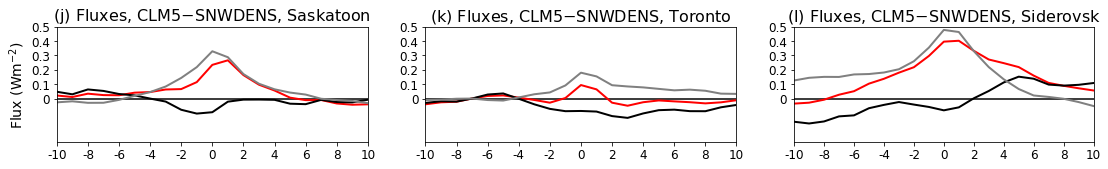

In [21]:
fig = plt.figure(figsize=(16,16))

cityplot=0
ax = plotlaggedreg(-1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)),
                   '(j) Fluxes, CLM5$-$SNWDENS, Saskatoon','Flux (Wm$^{-2}$)',x1[9],x2[9],y1[9],y2[9],color='red',
                  yrange=(-0.3,0.5),yticks=[0,0.1,0.2,0.3,0.4,0.5],yticknames=['0','0.1','0.2','0.3','0.4','0.5'])
#ax = oplotlaggedreg(ax, -1.*(data))
ax = oplotlaggedreg(ax, -1.*(-1.*data_scam.fldsregclm5.isel(city=cityplot) - (-1.*data_scam.fldsregsnowd.isel(city=cityplot))), color='black')
ax = oplotlaggedreg(ax, -1.*(flus_clm5.isel(city=cityplot) - flus_snowd.isel(city=cityplot)), color='gray')

cityplot=1
ax = plotlaggedreg(-1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), 
                   '(k) Fluxes, CLM5$-$SNWDENS, Toronto',' ',x1[10],x2[10],y1[10],y2[10],color='red',
                  yrange=(-0.3,0.5),yticks=[0,0.1,0.2,0.3,0.4,0.5],yticknames=['0','0.1','0.2','0.3','0.4','0.5'])
ax = oplotlaggedreg(ax, -1.*(-1.*data_scam.fldsregclm5.isel(city=cityplot) - (-1.*data_scam.fldsregsnowd.isel(city=cityplot))), color='black')
ax = oplotlaggedreg(ax, -1.*(flus_clm5.isel(city=cityplot) - flus_snowd.isel(city=cityplot)), color='gray')


cityplot=2
ax = plotlaggedreg(-1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), 
                   '(l) Fluxes, CLM5$-$SNWDENS, Siderovsk',' ',x1[11],x2[11],y1[11],y2[11],color='red',
                  yrange=(-0.3,0.5),yticks=[0,0.1,0.2,0.3,0.4,0.5],yticknames=['0','0.1','0.2','0.3','0.4','0.5'])
ax = oplotlaggedreg(ax, -1.*(-1.*data_scam.fldsregclm5.isel(city=cityplot) - (-1.*data_scam.fldsregsnowd.isel(city=cityplot))), color='black')
ax = oplotlaggedreg(ax, -1.*(flus_clm5.isel(city=cityplot) - flus_snowd.isel(city=cityplot)), color='gray')




In [8]:
print(data_scam.fldsregclm5)

<xarray.DataArray 'fldsregclm5' (lag: 21, city: 3)>
array([[-1.786604e-01, -8.740365e-02, -1.162273e-01],
       [-1.790470e-01, -4.823475e-02,  4.031105e-04],
       [-8.638885e-02,  1.011592e-02,  1.042985e-01],
       [-9.420485e-03,  6.212278e-02,  2.989817e-01],
       [ 2.733459e-02,  9.378476e-02,  5.422566e-01],
       [ 1.518051e-01,  1.246134e-01,  7.937480e-01],
       [ 2.466338e-01,  2.180343e-01,  1.089465e+00],
       [ 4.083142e-01,  3.228499e-01,  1.521613e+00],
       [ 6.031394e-01,  3.989311e-01,  2.221058e+00],
       [ 1.073209e+00,  1.081333e+00,  3.376611e+00],
       [ 2.153781e+00,  2.543883e+00,  4.593370e+00],
       [ 2.300235e+00,  2.152300e+00,  4.261002e+00],
       [ 1.734597e+00,  9.958517e-01,  3.382838e+00],
       [ 1.308833e+00,  5.771403e-01,  2.752253e+00],
       [ 9.950504e-01,  4.911835e-01,  2.335292e+00],
       [ 7.316226e-01,  3.145607e-01,  1.975611e+00],
       [ 5.411378e-01,  1.789365e-01,  1.632311e+00],
       [ 3.803952e-01,  1.6188